In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [53]:
train = pd.read_csv('train.csv')
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [54]:
test = pd.read_csv('test.csv')
test

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [56]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [57]:
categorical = [var for var in train.columns if train[var].dtype == 'O']
print('범주형 컬럼:',categorical)

numerical = [var for var in train.columns if train[var].dtype != 'O']
print("숫자형 컬럼:", numerical)


범주형 컬럼: ['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']
숫자형 컬럼: ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']


In [58]:
for var in train[categorical]:
    print(train[var].value_counts() / np.float(len(train)))

TRAIN_84321    0.00001
TRAIN_59495    0.00001
TRAIN_43444    0.00001
TRAIN_89717    0.00001
TRAIN_83618    0.00001
                ...   
TRAIN_87485    0.00001
TRAIN_71292    0.00001
TRAIN_18288    0.00001
TRAIN_12094    0.00001
TRAIN_72426    0.00001
Name: ID, Length: 96294, dtype: float64
 36 months    0.669606
 60 months    0.330394
Name: 대출기간, dtype: float64
10+ years    0.328006
2 years      0.087752
< 1 year     0.080732
3 years      0.078728
1 year       0.064895
Unknown      0.058893
5 years      0.058830
4 years      0.058031
8 years      0.050761
6 years      0.040231
7 years      0.039608
9 years      0.038881
10+years     0.009305
<1 year      0.003842
3            0.000924
1 years      0.000582
Name: 근로기간, dtype: float64
MORTGAGE    0.497788
RENT        0.391561
OWN         0.110640
ANY         0.000010
Name: 주택소유상태, dtype: float64
부채 통합     0.572725
신용 카드     0.254429
주택 개선     0.063971
기타        0.049068
주요 구매     0.018724
의료        0.010790
자동차       0.008277
소규모 사업   

<ipython-input-58-64a1766485ea>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))


In [59]:
for var in train[categorical]:
    print(var,"contains",train[var].unique())

ID contains ['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_96291' 'TRAIN_96292'
 'TRAIN_96293']
대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 contains ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적 contains ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']
대출등급 contains ['C' 'B' 'A' 'D' 'F' 'G' 'E']


전처리 목록

1. 근로기간에서 '< 1 year'와 '<1 year' 처럼 의미는 같지만 띄어쓰기에 따라 다른 데이터로 간주되는 부분을 모두 하나의 단위로 통합
2. 근로기간에서 'unknown' 데이터를 최빈값으로 대체
3. 아이디는 모델 학습에 영향이 없기에 제외

In [60]:
train.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
train.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
train.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
train.replace({'근로기간' : '3'}, '3 years', inplace=True)

train.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [61]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', nan, '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year'],
      dtype=object)

In [62]:
# 범주형 컬럼을 뽑아낸 categorical 변수에서 ID 값을 제거 

categorical.remove('ID')

In [63]:
train.isnull().sum()

ID                 0
대출금액               0
대출기간               0
근로기간            5671
주택소유상태             0
연간소득               0
부채_대비_소득_비율        0
총계좌수               0
대출목적               0
최근_2년간_연체_횟수       0
총상환원금              0
총상환이자              0
총연체금액              0
연체계좌수              0
대출등급               0
dtype: int64

In [64]:
train['근로기간'].fillna(train['근로기간'].mode()[0], inplace=True)

In [65]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [66]:
train.drop('ID',axis=1, inplace=True)

In [67]:
train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,10+ years,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


array([[<AxesSubplot:title={'center':'대출금액'}>,
        <AxesSubplot:title={'center':'연간소득'}>,
        <AxesSubplot:title={'center':'부채_대비_소득_비율'}>],
       [<AxesSubplot:title={'center':'총계좌수'}>,
        <AxesSubplot:title={'center':'최근_2년간_연체_횟수'}>,
        <AxesSubplot:title={'center':'총상환원금'}>],
       [<AxesSubplot:title={'center':'총상환이자'}>,
        <AxesSubplot:title={'center':'총연체금액'}>,
        <AxesSubplot:title={'center':'연체계좌수'}>]], dtype=object)

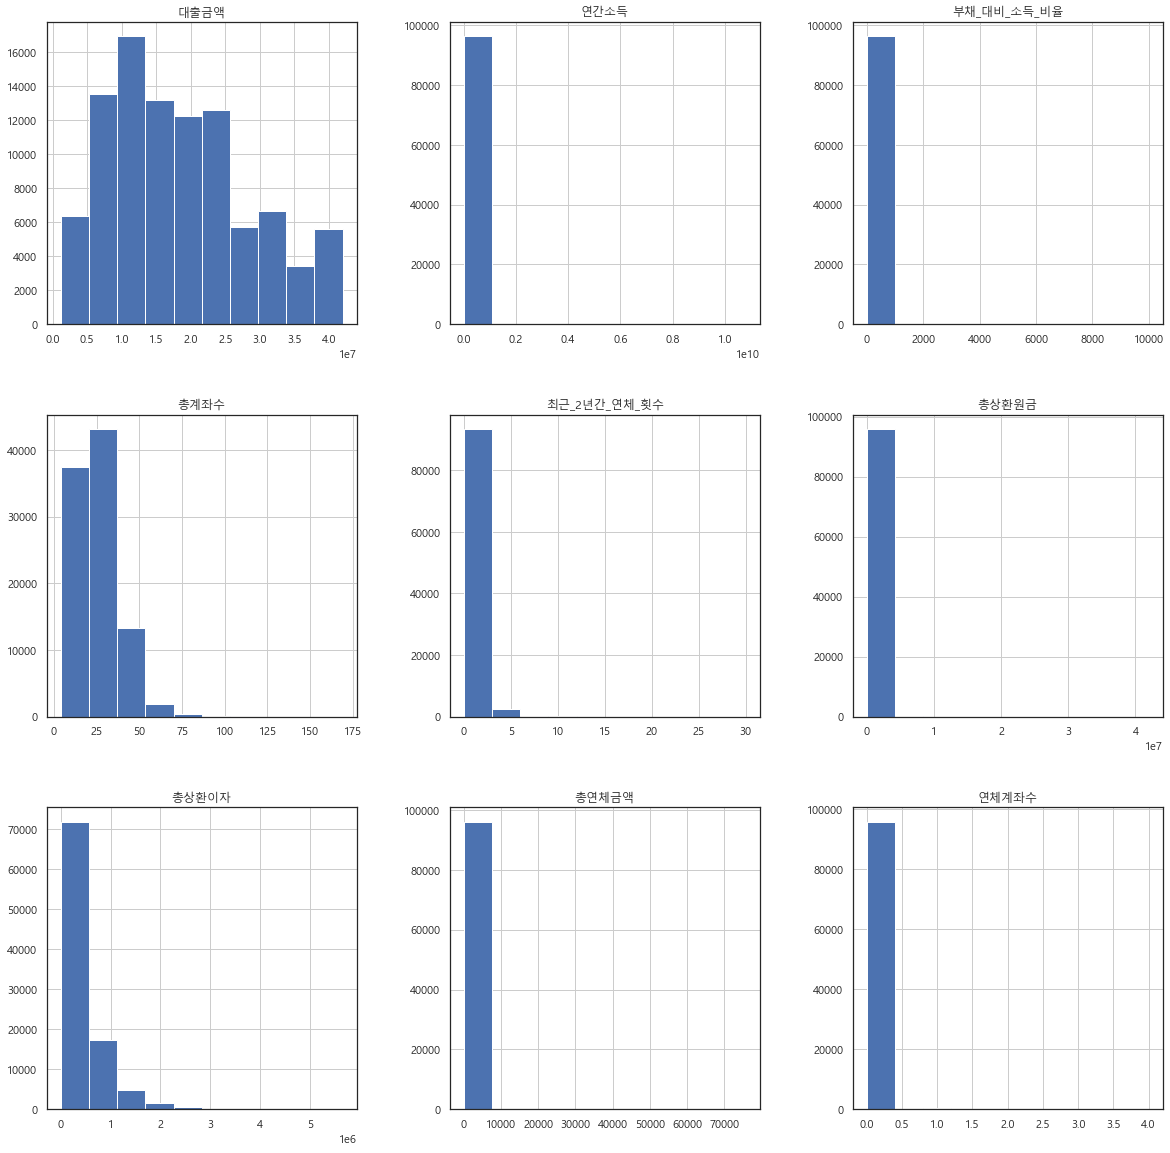

In [68]:
train.hist(figsize=(20,20))

In [69]:
for var in numerical:
    name = var
    Q1 = train[var].quantile(.25)
    Q3 = train[var].quantile(.75)
    print(name,'컬럼의 1 사분위수:',Q1)
    print(name,'컬럼의 3 사분위수:',Q3)
    print('===========================')

대출금액 컬럼의 1 사분위수: 10200000.0
대출금액 컬럼의 3 사분위수: 24000000.0
연간소득 컬럼의 1 사분위수: 57600000.0
연간소득 컬럼의 3 사분위수: 112800000.0
부채_대비_소득_비율 컬럼의 1 사분위수: 12.65
부채_대비_소득_비율 컬럼의 3 사분위수: 25.54
총계좌수 컬럼의 1 사분위수: 17.0
총계좌수 컬럼의 3 사분위수: 32.0
최근_2년간_연체_횟수 컬럼의 1 사분위수: 0.0
최근_2년간_연체_횟수 컬럼의 3 사분위수: 0.0
총상환원금 컬럼의 1 사분위수: 307572.0
총상환원금 컬럼의 3 사분위수: 1055076.0
총상환이자 컬럼의 1 사분위수: 134616.0
총상환이자 컬럼의 3 사분위수: 570216.0
총연체금액 컬럼의 1 사분위수: 0.0
총연체금액 컬럼의 3 사분위수: 0.0
연체계좌수 컬럼의 1 사분위수: 0.0
연체계좌수 컬럼의 3 사분위수: 0.0


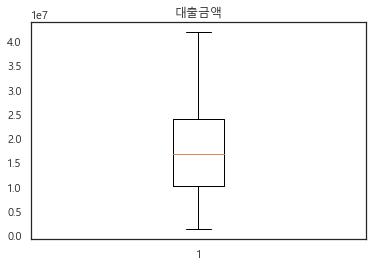

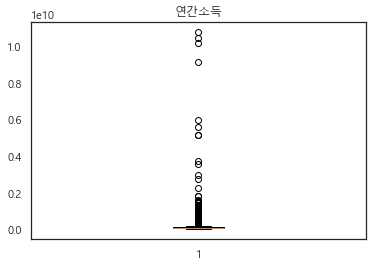

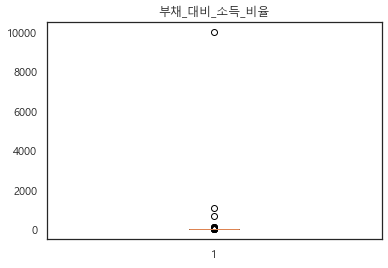

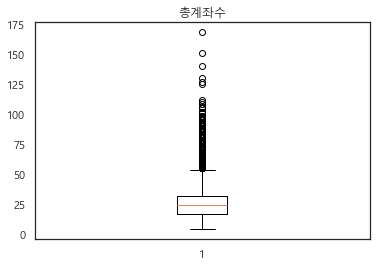

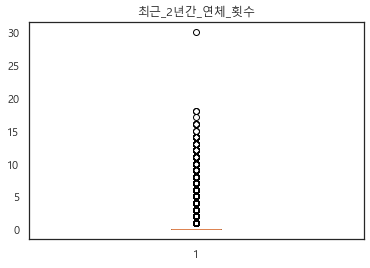

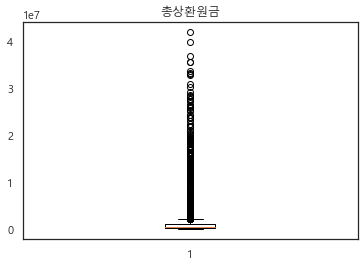

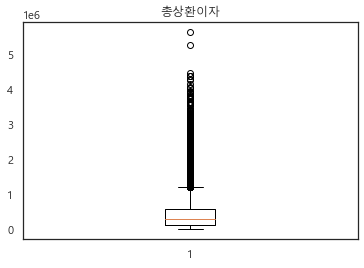

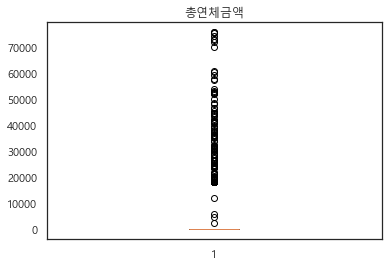

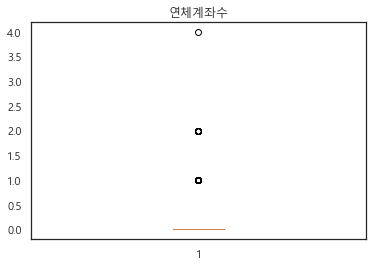

In [70]:
for var in numerical:
    name = var
    plt.boxplot(train[var])
    plt.title(name)
    plt.show()

Text(0.5, 1.0, 'numerical 데이터 간의 상관관계')

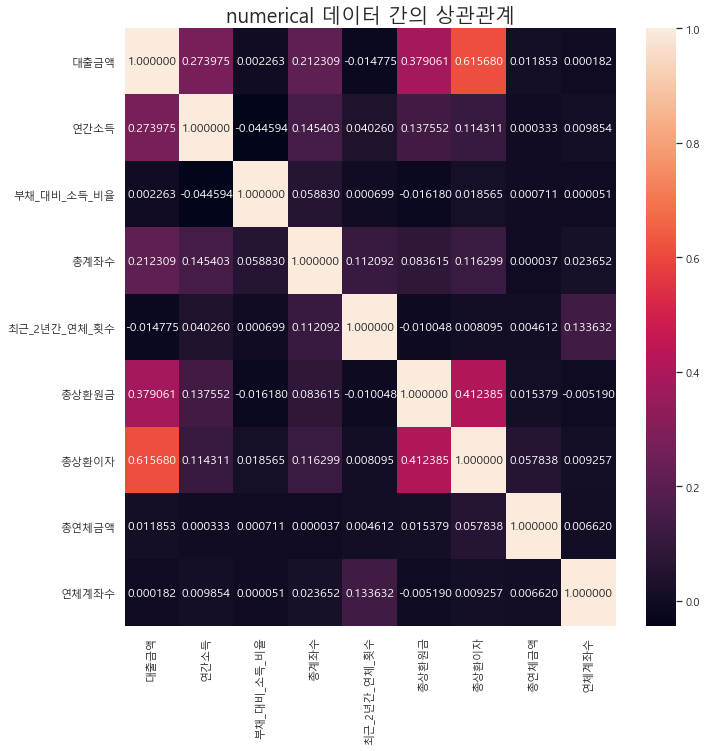

In [71]:
x = train.corr(method='pearson')
plt.figure(figsize=(11,11))
sns.heatmap(x, annot=True,fmt='f')
plt.title('numerical 데이터 간의 상관관계', fontsize=20)

In [72]:
# 다중공선성 확인 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# 독립 변수만 선택
independent_vars = train[numerical]

# VIF 계산
vif_result = calculate_vif(independent_vars)
print(vif_result)

       Variable       VIF
0          대출금액  6.499944
1          연간소득  2.059207
2   부채_대비_소득_비율  1.300284
3          총계좌수  3.724233
4  최근_2년간_연체_횟수  1.175073
5         총상환원금  2.039780
6         총상환이자  3.368389
7         총연체금액  1.005709
8         연체계좌수  1.023815


In [73]:
train[categorical]

,대출기간,근로기간,주택소유상태,대출목적,대출등급
0,36 months,6 years,RENT,부채 통합,C
1,60 months,10+ years,MORTGAGE,주택 개선,B
2,36 months,5 years,MORTGAGE,부채 통합,A
3,36 months,8 years,MORTGAGE,부채 통합,C
4,60 months,10+ years,RENT,주요 구매,B
...,...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드,C
96290,60 months,10+ years,MORTGAGE,주택 개선,E
96291,36 months,1 year,MORTGAGE,신용 카드,A
96292,36 months,5 years,MORTGAGE,부채 통합,D


In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_categorical_column = ['대출기간', '근로기간', '주택소유상태', '대출목적']
encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = encoder.fit_transform(train[train_categorical_column])

c:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
train_encoded_rf = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(train_categorical_column))
train_encoded_rf

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96290,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
train_new = pd.concat([train_encoded_rf, train[numerical], train['대출등급']], axis=1)
train_new

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C
96290,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28800000,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E
96291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A
96292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15600000,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,D


In [77]:
train_new.head(3)

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A


In [78]:
test_categorical = [var for var in test if test[var].dtype =='O']
test_categorical

['ID', '대출기간', '근로기간', '주택소유상태', '대출목적']

In [79]:
test_numerical = [var for var in test if test[var].dtype != 'O']
test_numerical

['대출금액',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수']

In [80]:
test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [81]:
for var in test_categorical:
    print(var,'contains',test[var].unique())

ID contains ['TEST_00000' 'TEST_00001' 'TEST_00002' ... 'TEST_64194' 'TEST_64195'
 'TEST_64196']
대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years' '10+years' '<1 year' '3'
 '1 years']
주택소유상태 contains ['MORTGAGE' 'RENT' 'OWN']
대출목적 contains ['주택 개선' '부채 통합' '신용 카드' '기타' '주요 구매' '이사' '휴가' '소규모 사업' '주택' '의료' '자동차'
 '재생 에너지' '결혼']


In [82]:
test.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
test.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
test.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
test.replace({'근로기간' : '3'}, '3 years', inplace=True)

test.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [83]:
test.isnull().sum()

ID                 0
대출금액               0
대출기간               0
근로기간            3862
주택소유상태             0
연간소득               0
부채_대비_소득_비율        0
총계좌수               0
대출목적               0
최근_2년간_연체_횟수       0
총상환원금              0
총상환이자              0
총연체금액              0
연체계좌수              0
dtype: int64

In [84]:
test['근로기간'].fillna(test['근로기간'].mode()[0], inplace=True)
test

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [85]:
test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [86]:
test_categorical.remove('ID')

In [87]:
test_categorical

['대출기간', '근로기간', '주택소유상태', '대출목적']

In [88]:
test.drop('ID', axis=1, inplace=True)

In [89]:
test

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [90]:
# 독립 변수만 선택
independent_vars = test[numerical]

# VIF 계산
vif_result = calculate_vif(independent_vars)
print(vif_result)

       Variable       VIF
0          대출금액  6.446632
1          연간소득  1.834528
2   부채_대비_소득_비율  1.210139
3          총계좌수  3.637283
4  최근_2년간_연체_횟수  1.173458
5         총상환원금  2.174522
6         총상환이자  3.396429
7         총연체금액  1.005882
8         연체계좌수  1.018401


In [97]:
test_categorical_column = test_categorical
encoder = OneHotEncoder(drop='first', sparse=False)
test_encoded = encoder.fit_transform(test[test_categorical_column])

c:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
test_encoded_rf = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(test_categorical_column))
test_encoded_rf

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
test_new = pd.concat([test_encoded_rf, test[test_numerical]], axis=1)
test_new

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,16800000,132000000,19.64,12,0,394692,146604.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,8400000,89971200,15.84,25,0,0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,17280000,150000000,8.41,20,0,1786980,281820.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14400000,66000000,13.72,30,1,669024,281724.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,27600000,55200000,30.50,12,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30000000,78000000,22.08,27,2,1307532,763380.0,0.0,0.0
64193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30000000,109200000,12.06,26,0,960612,1245252.0,0.0,0.0
64194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6120000,39600000,28.80,33,0,131520,80880.0,0.0,0.0
64195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11520000,66000000,25.44,41,1,1339536,601872.0,0.0,0.0
